# Algoritmo Fuzzy C Means

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo Fuzzy C Means](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from utils.parametros import ParametrosCmeans
from matplotlib import pyplot as plt
from fcmeans import FCM
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

### DATASET Funcao Renal

In [10]:
lista_qtd_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)

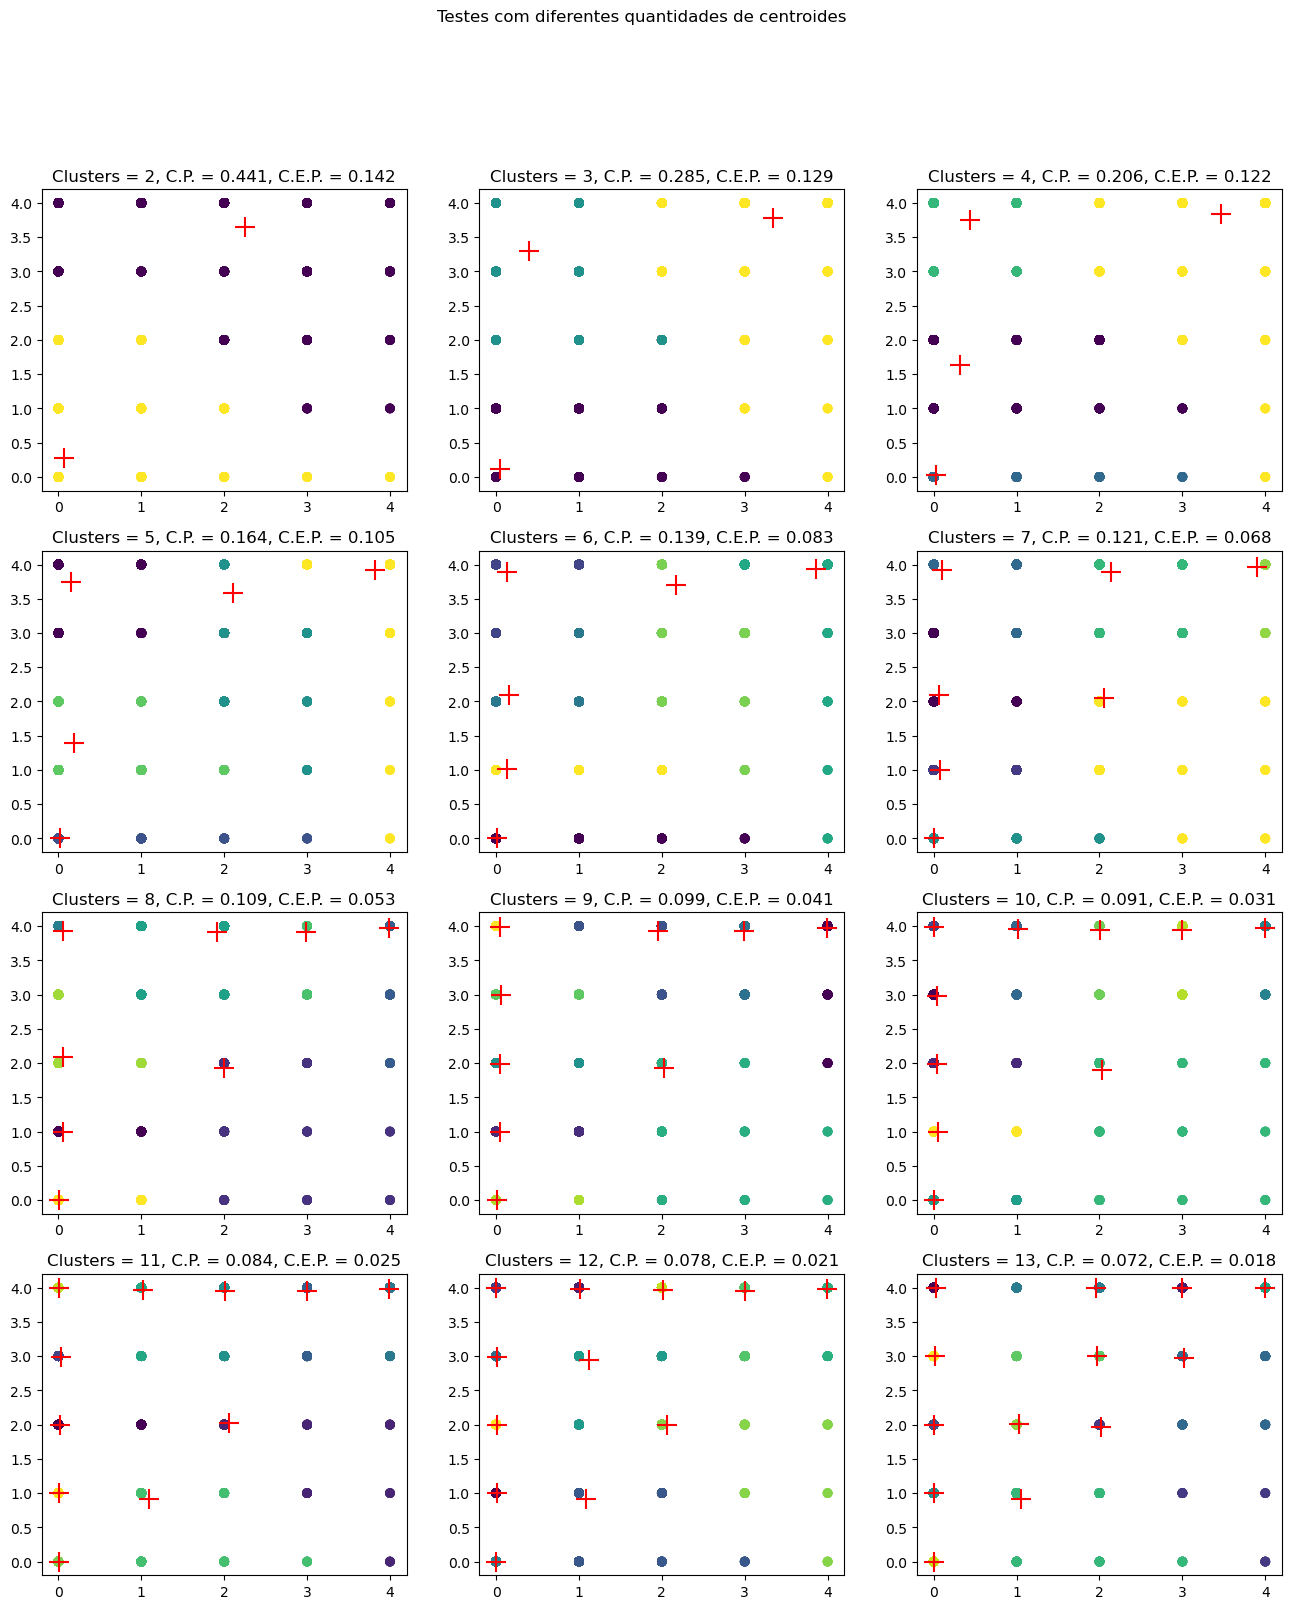

In [14]:
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

In [ ]:
metricas_distancia = [
    "cosine",
    "minkowski",
    "euclidean"
]

parametros_fuzzy = [i for i in np.arange(1.0, 3.0, 0.5)]

parametros_minkowski = [
    {"p": 0.25},
    {"p": 0.50},
    {"p": 1.0},
    {"p": 2.0},
]